In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

C:\Users\Sanjana\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [7]:
from sklearn.datasets import load_iris

In [8]:
iris=load_iris()

In [16]:
X=pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])

In [17]:
y=iris['target']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
treec=DecisionTreeClassifier(max_depth=2)

In [28]:
treec.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.159\nsamples = 46\nvalue = [0, 4, 42]')]

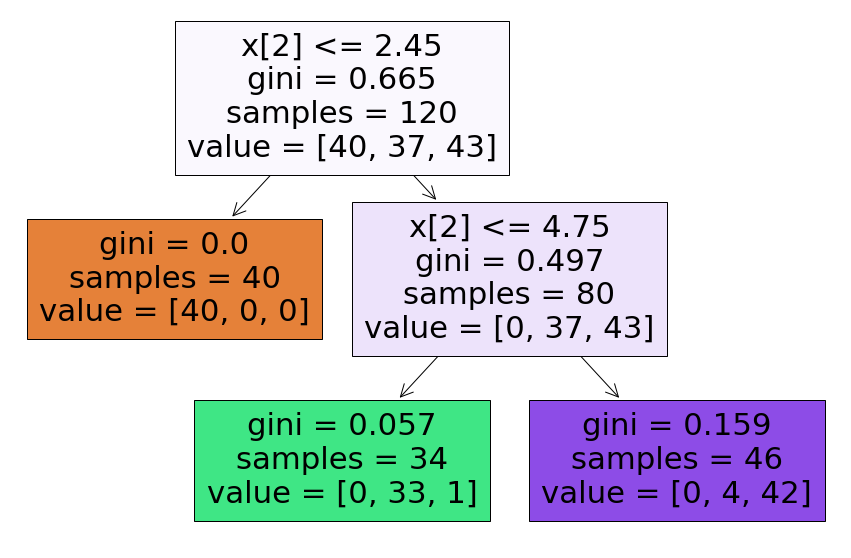

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treec,filled=True)

In [26]:
y_pred=treec.predict(X_test)

## Prepruning and hyperparameter tuning

In [38]:
params={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
treemodel=DecisionTreeClassifier()

In [41]:
grid=GridSearchCV(treec,param_grid=params,cv=5,scoring='accuracy')

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [44]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [45]:
y_pred=grid.predict(X_test)

In [46]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 0, 1, 0, 1, 1, 1, 2])